In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D


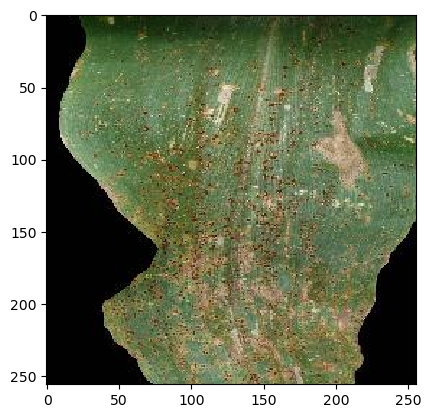

In [6]:
img =  image.load_img('/home/edwin/Desktop/VSpython/maize/train/Common_Rust/Corn_Common_Rust (211).JPG')
plt.imshow(img)

In [7]:
train =ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [8]:
train_dataset = train.flow_from_directory('/home/edwin/Desktop/VSpython/maize/train',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

validation_dataset = train.flow_from_directory('/home/edwin/Desktop/VSpython/maize/val',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

Found 3360 images belonging to 4 classes.
Found 828 images belonging to 4 classes.


In [9]:
train_dataset.class_indices
validation_dataset.class_indices

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_spot': 2, 'Healthy': 3}

In [10]:
train_labels = train_dataset.classes
train_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [11]:
val_labels =validation_dataset.classes
val_labels.size

828

In [12]:
#define ur model
model = Sequential([
    Conv2D(16, (3,3), activation  = 'relu', input_shape = (200, 200, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation  = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

Epoch 1/3
53/53 [==============================] - 20s 349ms/step - loss: -12317.9980 - accuracy: 0.3268 - val_loss: -79194.5859 - val_accuracy: 0.2500
Epoch 2/3
53/53 [==============================] - 22s 417ms/step - loss: -485000.5625 - accuracy: 0.3271 - val_loss: -1827530.0000 - val_accuracy: 0.2500
Epoch 3/3
53/53 [==============================] - 22s 423ms/step - loss: -4976716.0000 - accuracy: 0.3271 - val_loss: -12700098.0000 - val_accuracy: 0.2500


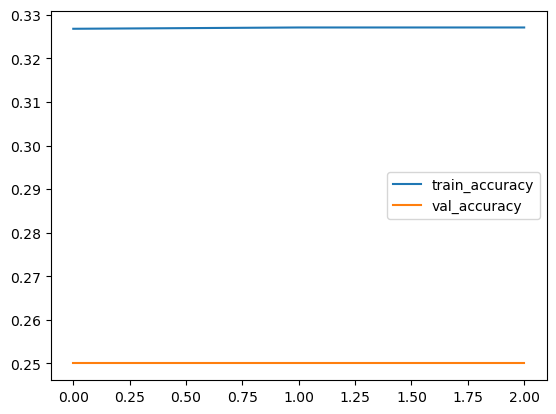

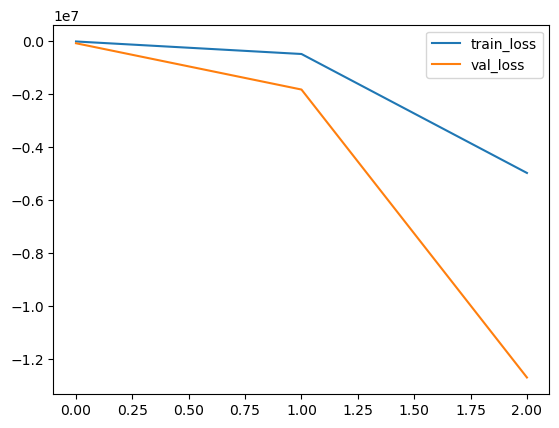

In [ ]:
history= model.fit(train_dataset,  epochs= 4,validation_data=validation_dataset )

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(validation_dataset)

13/13 [==============================] - 4s 327ms/step - loss: -12700097.0000 - accuracy: 0.2500


[-12700097.0, 0.25]

In [16]:
class_labels = {v: k for k, v in train_dataset.class_indices.items()}
print(class_labels)

{0: 'Blight', 1: 'Common_Rust', 2: 'Gray_Leaf_Spot', 3: 'Healthy'}


1/1 [==============================] - 0s 21ms/step
[[1.]]
1/1 [==============================] - 0s 25ms/step
This might be  Blight


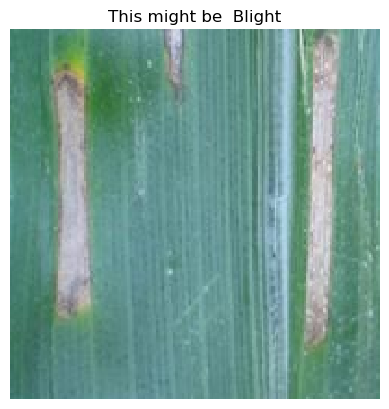

In [28]:
test_dir_path = '/home/edwin/Desktop/VSpython/maize/Test'
import os
import random
images  = os.listdir(test_dir_path)
random_image = random.choice(images)
image_path = os.path.join(test_dir_path, random_image)

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

text = (f"This might be  {class_labels[predicted_class]}")
print(text)
# Display the image with the prediction
plt.imshow(img)
plt.title(text)
plt.axis('off')
plt.show()

In [18]:
# test_dir_path = '/home/edwin/Desktop/VSpython/tomato/Test'
# import os
# import random
# images  = os.listdir(test_dir_path)
# random_image = random.choice(images)
# image_path = os.path.join(test_dir_path, random_image)

# img = image.load_img(image_path, target_size=(200, 200))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array /= 255.0

# prediction = model.predict(img_array)
# print(prediction)


# prediction = model.predict(img_array)
# predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

# text = (f"This might be  {class_labels[predicted_class]}")
# print(text)
# # Display the image with the prediction
# plt.imshow(img)
# plt.title(text)
# plt.axis('off')
# plt.show()